In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import os
import shutil
from numpy.linalg import svd
import cv2
import pywt
import matplotlib.pyplot as plt


C:\Users\PRANAV JADHAV\AppData\Local\Temp\ipykernel_11300\25529931.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [18]:
wavelet_variations = ["bior1.1", "bior1.3", "bior1.5",
                      "db1", "haar", "rbio1.1",  "rbio3.1"]

In [19]:
bengin={}


In [21]:
def wavelet_transform_and_save(image_path, wavelet_name, save_dir, dictt):
    
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    
    coeffs2 = pywt.dwt2(original, wavelet_name)
    LL, (LH, HL, HH) = coeffs2  # Approximation, Horizontal, Vertical, Diagonal

    
    def save_resized_image(image, save_path, dictt):
        image_shape = image.shape
        shape_key = f"{image_shape[0]}x{image_shape[1]}"

        if image_shape != (256, 256):
            image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
            shape_key = "256x256"

        # Save the image
        plt.imsave(save_path, image, cmap='gray')

        if shape_key in dictt:
            dictt[shape_key] += 1
        else:
            dictt[shape_key] = 1

    image_name = os.path.splitext(os.path.basename(image_path))[0]
    horizontal_save_path = os.path.join(
        save_dir, f"{image_name}_{wavelet_name}_horizontal.png")
    save_resized_image(LH, horizontal_save_path, dictt)

    vertical_save_path = os.path.join(
        save_dir, f"{image_name}_{wavelet_name}_vertical.png")
    save_resized_image(HL, vertical_save_path, dictt)

    print(f"Saved horizontal details at: {horizontal_save_path}")
    print(f"Saved vertical details at: {vertical_save_path}")

In [22]:
image_folder = '../DATA_PROCESSED/SVD/Bengin/'
save_folder = "../DATA_PROCESSED/Pywavelet/Bengin/"

In [23]:
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [24]:
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Processing {filename}...")

        for wavelet in wavelet_variations:
            wavelet_transform_and_save(image_path, wavelet, save_folder,bengin)

Processing Bengin case (1).jpg...
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.1_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.3_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.3_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.5_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_bior1.5_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_db1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_db1_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Bengin/Bengin case (1)_haar_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Bengin/Beng

In [25]:
bengin

{'256x256': 1680}

In [26]:
Malignant = {}

In [27]:
image_folder = '../DATA_PROCESSED/SVD/Malignant/'
save_folder = "../DATA_PROCESSED/Pywavelet/Malignant/"

In [28]:
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Processing {filename}...")

        for wavelet in wavelet_variations:
            wavelet_transform_and_save(image_path, wavelet, save_folder,Malignant)

Processing Malignant case (1).jpg...
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.1_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.3_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.3_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.5_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_bior1.5_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_db1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_db1_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (1)_haar_horizontal.png
Saved ver

In [29]:
Malignant

{'256x256': 7840}

In [30]:
Normal ={}

In [31]:
image_folder = '../DATA_PROCESSED/SVD/Normal/'
save_folder = "../DATA_PROCESSED/Pywavelet/Normal/"

In [32]:
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        print(f"Processing {filename}...")

        for wavelet in wavelet_variations:
            wavelet_transform_and_save(image_path, wavelet, save_folder,Normal)

Processing Normal case (1).jpg...
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.1_vertical.png


Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.3_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.3_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.5_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_bior1.5_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_db1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_db1_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_haar_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_haar_vertical.png
Saved horizontal details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_rbio1.1_horizontal.png
Saved vertical details at: ../DATA_PROCESSED/Pywavelet/Normal/Normal case (1)_rbio1.1_vertical.png
Save

In [33]:
Normal

{'256x256': 5810}

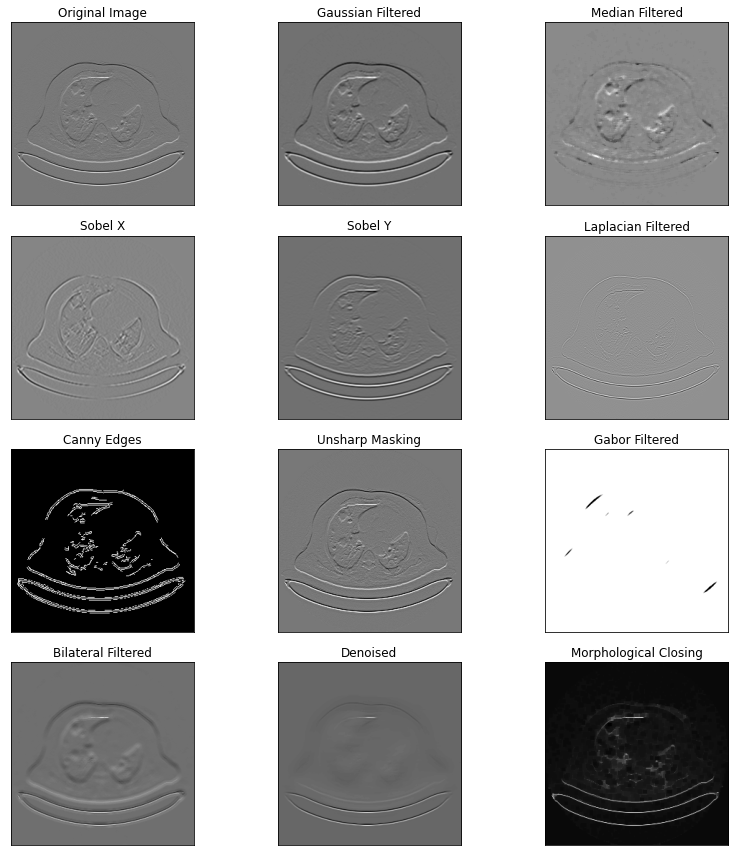

In [6]:

image = cv2.imread(
    '../DATA_PROCESSED/Pywavelet/Malignant/Malignant case (101)_db1_horizontal.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Filter for smoothing
gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Median Filter to reduce salt-and-pepper noise
median_filtered = cv2.medianBlur(image, 5)

# Apply Sobel Filter for edge detection (X and Y gradients)
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # X-direction
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Y-direction

# Apply Laplacian Filter for edge enhancement
laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)

# Apply Canny Edge Detector
canny_edges = cv2.Canny(image, 100, 200)

# Apply Unsharp Masking for sharpening
blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

# Apply Gabor Filter for texture analysis
gabor_filter = cv2.getGaborKernel(
    (21, 21), 5, np.pi/4, 10, 0.5, 0, ktype=cv2.CV_32F)
gabor_filtered = cv2.filter2D(image, cv2.CV_8UC3, gabor_filter)

# Apply Bilateral Filter for edge-preserving denoising
bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

# Apply Non-Local Means Denoising
denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# Morphological Closing operation to fill small holes
kernel = np.ones((5, 5), np.uint8)
morph_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display all the filtered images
titles = ['Original Image', 'Gaussian Filtered', 'Median Filtered', 'Sobel X', 'Sobel Y',
          'Laplacian Filtered', 'Canny Edges', 'Unsharp Masking',
          'Gabor Filtered', 'Bilateral Filtered', 'Denoised', 'Morphological Closing']

images = [image, gaussian_filtered, median_filtered, sobelx, sobely,
          laplacian_filtered, canny_edges, unsharp_mask, gabor_filtered,
          bilateral_filtered, denoised_image, morph_image]

plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [42]:
input_folder = '../DATA_PROCESSED/Pywavelet/Bengin/'
output_folder = '../DATA_PROCESSED/filters/Bengin/'
image_files = [f for f in os.listdir(
    input_folder) if f.endswith(('.jpg', '.png'))]


def apply_filters_and_save(image_path, output_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply various filters
    gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 0)
    median_filtered = cv2.medianBlur(image, 5)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobely = cv2.convertScaleAbs(sobely)
    laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)
    canny_edges = cv2.Canny(image, 100, 200)
    blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    gabor_filter = cv2.getGaborKernel(
        (21, 21), 5, np.pi/4, 10, 0.5, 0, ktype=cv2.CV_32F)
    gabor_filtered = cv2.filter2D(image, cv2.CV_32F, gabor_filter)
    gabor_filtered = cv2.convertScaleAbs(gabor_filtered)
    bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)
    denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # List of all filtered images including the original
    images = [image, gaussian_filtered, median_filtered, sobelx, sobely, laplacian_filtered,
              canny_edges, unsharp_mask, gabor_filtered, bilateral_filtered,
              denoised_image, morph_image]

    # Titles for the grid layout, including the original image
    titles = ['Original', 'Gaussian', 'Median', 'Sobel X', 'Sobel Y', 'Laplacian',
              'Canny', 'Unsharp', 'Gabor', 'Bilateral', 'Denoised', 'Morphology']

    # Set up a grid layout (e.g., 4x3 grid)
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))

    # Plot each image in the grid
    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    # Adjust layout and save the grid of images
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()


# Process the first 14 images and save the results
for i, image_file in enumerate(image_files[:14]):
    image_path = os.path.join(input_folder, image_file)
    output_image_path = os.path.join(
        output_folder, f'filtered_grid_image_{i+1}.png')

    # Apply filters and save the result
    apply_filters_and_save(image_path, output_image_path)

print(
    f"Processed and saved {len(image_files[:14])} images in '{output_folder}'")

Processed and saved 14 images in '../DATA_PROCESSED/filters/Bengin/'


In [43]:
input_folder = '../DATA_PROCESSED/Pywavelet/Malignant/'
output_folder = '../DATA_PROCESSED/filters/Malignant/'
image_files = [f for f in os.listdir(
    input_folder) if f.endswith(('.jpg', '.png'))]


def apply_filters_and_save(image_path, output_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply various filters
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered = cv2.medianBlur(image, 5)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobely = cv2.convertScaleAbs(sobely)
    laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)
    canny_edges = cv2.Canny(image, 100, 200)
    blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    gabor_filter = cv2.getGaborKernel(
        (21, 21), 5, np.pi/4, 10, 0.5, 0, ktype=cv2.CV_32F)
    gabor_filtered = cv2.filter2D(image, cv2.CV_32F, gabor_filter)
    gabor_filtered = cv2.convertScaleAbs(gabor_filtered)
    bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)
    denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # List of all filtered images including the original
    images = [image, gaussian_filtered, median_filtered, sobelx, sobely, laplacian_filtered,
              canny_edges, unsharp_mask, gabor_filtered, bilateral_filtered,
              denoised_image, morph_image]

    # Titles for the grid layout, including the original image
    titles = ['Original', 'Gaussian', 'Median', 'Sobel X', 'Sobel Y', 'Laplacian',
              'Canny', 'Unsharp', 'Gabor', 'Bilateral', 'Denoised', 'Morphology']

    # Set up a grid layout (e.g., 4x3 grid)
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))

    # Plot each image in the grid
    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    # Adjust layout and save the grid of images
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()


# Process the first 14 images and save the results
for i, image_file in enumerate(image_files[:14]):
    image_path = os.path.join(input_folder, image_file)
    output_image_path = os.path.join(
        output_folder, f'filtered_grid_image_{i+1}.png')

    # Apply filters and save the result
    apply_filters_and_save(image_path, output_image_path)

print(
    f"Processed and saved {len(image_files[:14])} images in '{output_folder}'")

Processed and saved 14 images in '../DATA_PROCESSED/filters/Malignant/'


In [44]:
input_folder = '../DATA_PROCESSED/Pywavelet/Normal/'
output_folder = '../DATA_PROCESSED/filters/Normal/'
image_files = [f for f in os.listdir(
    input_folder) if f.endswith(('.jpg', '.png'))]


def apply_filters_and_save(image_path, output_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply various filters
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered = cv2.medianBlur(image, 5)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobelx = cv2.convertScaleAbs(sobelx)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobely = cv2.convertScaleAbs(sobely)
    laplacian_filtered = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)
    canny_edges = cv2.Canny(image, 100, 200)
    blurred = cv2.GaussianBlur(image, (9, 9), 10.0)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    gabor_filter = cv2.getGaborKernel(
        (21, 21), 5, np.pi/4, 10, 0.5, 0, ktype=cv2.CV_32F)
    gabor_filtered = cv2.filter2D(image, cv2.CV_32F, gabor_filter)
    gabor_filtered = cv2.convertScaleAbs(gabor_filtered)
    bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)
    denoised_image = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # List of all filtered images including the original
    images = [image, gaussian_filtered, median_filtered, sobelx, sobely, laplacian_filtered,
              canny_edges, unsharp_mask, gabor_filtered, bilateral_filtered,
              denoised_image, morph_image]

    # Titles for the grid layout, including the original image
    titles = ['Original', 'Gaussian', 'Median', 'Sobel X', 'Sobel Y', 'Laplacian',
              'Canny', 'Unsharp', 'Gabor', 'Bilateral', 'Denoised', 'Morphology']

    # Set up a grid layout (e.g., 4x3 grid)
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))

    # Plot each image in the grid
    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

    # Adjust layout and save the grid of images
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()


# Process the first 14 images and save the results
for i, image_file in enumerate(image_files[:14]):
    image_path = os.path.join(input_folder, image_file)
    output_image_path = os.path.join(
        output_folder, f'filtered_grid_image_{i+1}.png')

    # Apply filters and save the result
    apply_filters_and_save(image_path, output_image_path)

print(
    f"Processed and saved {len(image_files[:14])} images in '{output_folder}'")

Processed and saved 14 images in '../DATA_PROCESSED/filters/Normal/'
